In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy
import cartopy.crs as ccrs
import matplotlib
%matplotlib inline
from netCDF4 import Dataset


import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.colors as colors
from sklearn import datasets
import iris.analysis
import numpy.ma as ma

import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point



import matplotlib.cm as mpl_cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.pyplot import xcorr


from scipy.interpolate import splrep, splev
from scipy.stats import pearsonr
from scipy import signal 

import math
from matplotlib import mlab

import warnings
warnings.filterwarnings("ignore")

## load 5 new added lig_models: acc, ec, fgoalsg3, noresm2, hadgem

In [3]:
# load files
filename_30='../../../Desktop/esgf_data_folder/streamfunction/lig_fgoalsg3_combined.nc'
fgoalsg3_1=xr.open_dataset(filename_30,decode_times=False)

filename_31='../../../Desktop/esgf_data_folder/streamfunction/lig_ec_earth_combined.nc'
ec_1=xr.open_dataset(filename_31,decode_times=False)

filename_32='../../../Desktop/esgf_data_folder/streamfunction/lig_access_combined.nc'
acc_1=xr.open_dataset(filename_32,decode_times=False)

filename_33='../../../Desktop/esgf_data_folder/streamfunction/lig_noresm2_combined.nc'
noresm2_1=xr.open_dataset(filename_33,decode_times=False)

filename_40='../../../Desktop/esgf_data_folder/streamfunction/lig_hadgem_combined.nc'
hadgem_1=xr.open_dataset(filename_40,decode_times=False)

In [4]:
# select the atlantic_arctic ocean, then do the time averages
fgoalsg3_2=fgoalsg3_1.sel(basin=0)
fgoalsg3=fgoalsg3_2.mean(dim='time')

ec_2=ec_1.sel(basin=1)
ec=ec_2.mean(dim='time')

acc_2=acc_1.sel(basin=0)
acc=acc_2.mean(dim='time')

noresm2_2=noresm2_1.sel(basin=0)
noresm2=noresm2_2.mean(dim='time')

hadgem_2=hadgem_1.sel(basin=0)
hadgem=hadgem_2.mean(dim='time')

In [5]:
acc_amoc_mean=acc.msftmz
ec_amoc_mean=ec.msftyz
fgoalsg3_amoc_mean=fgoalsg3.msftmz
noresm2_amoc_mean=noresm2.msftmz
hadgem_amoc_mean=hadgem.msftyz

## load 4 new added pi_models: acc, ec, fgoalsg3, noresm2, hadgem

In [6]:
filename_34='../../../Desktop/esgf_data_folder/streamfunction/pi_fgoalsg3_combined.nc'
pi_fgoalsg3_1=xr.open_dataset(filename_34,decode_times=False)

filename_35='../../../Desktop/esgf_data_folder/streamfunction/pi_access_combined.nc'
pi_acc_1=xr.open_dataset(filename_35,decode_times=False)

In [7]:
pi_fgoalsg3_2=pi_fgoalsg3_1.sel(basin=0)
pi_fgoalsg3=pi_fgoalsg3_2.mean(dim='time')

pi_acc_2=pi_acc_1.sel(basin=0)
pi_acc=pi_acc_2.mean(dim='time')

In [8]:
filename_7='EC-Earth3-LR_piControl.cvdp_data.2219-2419.nc'
pi_ec=xr.open_dataset(filename_7,decode_times=False)

filename_8='NorESM2-LM_piControl.cvdp_data.1710-2100.nc'
pi_noresm2=xr.open_dataset(filename_8,decode_times=False)

filename_27='HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc'
pi_hadgem=xr.open_dataset(filename_27,decode_times=False)

In [9]:
pi_acc_amoc_mean=pi_acc.msftyz
pi_ec_amoc_mean=pi_ec.amoc_mean_ann
pi_fgoalsg3_amoc_mean=pi_fgoalsg3.msftmz
pi_hadgem_amoc_mean=pi_hadgem.amoc_mean_ann
pi_noresm2_amoc_mean=pi_noresm2.amoc_mean_ann

## old code: load LIG and PI amoc data (4 models)

In [10]:
filename_3='CESM2_lig127k.cvdp_data.1-700.nc'
cesm=xr.open_dataset(filename_3,decode_times=False)

filename_4='CESM2_piControl.cvdp_data.701-1200.nc'
pi_cesm=xr.open_dataset(filename_4,decode_times=False)

filename_5='FGOALS-f3-L_lig127k.cvdp_data.700-1199.nc'
fgoalsf3=xr.open_dataset(filename_5,decode_times=False)

filename_6='FGOALS-f3-L_piCtl-substitute.cvdp_data.1850-1899.nc'
pi_fgoalsf3=xr.open_dataset(filename_6,decode_times=False)

filename_11='GISS-E2-1-G_lig127k.cvdp_data.2900-2999.nc'
giss=xr.open_dataset(filename_11,decode_times=False)

filename_12='GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc'
pi_giss=xr.open_dataset(filename_12,decode_times=False)

filename_17='IPSL-CM6A-LR_lig127k.cvdp_data.1850-2399.nc'
ipsl=xr.open_dataset(filename_17,decode_times=False)

filename_18='IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc'
pi_ipsl=xr.open_dataset(filename_18,decode_times=False)


In [11]:
cesm_amoc_mean=cesm.amoc_mean_ann
pi_cesm_amoc_mean=pi_cesm.amoc_mean_ann

fgoalsf3_amoc_mean=fgoalsf3.amoc_mean_ann
pi_fgoalsf3_amoc_mean=pi_fgoalsf3.amoc_mean_ann

giss_amoc_mean=giss.amoc_mean_ann
pi_giss_amoc_mean=pi_giss.amoc_mean_ann

ipsl_amoc_mean=ipsl.amoc_mean_ann
pi_ipsl_amoc_mean=pi_ipsl.amoc_mean_ann

In [12]:
amoc_mean=[acc_amoc_mean, cesm_amoc_mean, ec_amoc_mean, fgoalsf3_amoc_mean, 
           fgoalsg3_amoc_mean, giss_amoc_mean, hadgem_amoc_mean, 
           ipsl_amoc_mean, noresm2_amoc_mean]

In [13]:
pi_amoc_mean=[pi_acc_amoc_mean, pi_cesm_amoc_mean, pi_ec_amoc_mean, pi_fgoalsf3_amoc_mean, 
              pi_fgoalsg3_amoc_mean, pi_giss_amoc_mean, pi_hadgem_amoc_mean, 
              pi_ipsl_amoc_mean, pi_noresm2_amoc_mean]

In [14]:
lig_modelname=['acc','cesm','ec','fgoalsf3','fgoalsg3','giss','hadgem','ipsl','noresm2']

## calculate the max AMOC at 30/50N

### lig --- for cesm, fgoalsf3, giss, ipsl, as they have coords: 'lat_amoc'
### pi--- for cesm, ec, fgoalsf3, giss, hadgem, ipsl, noresm2, as they have coords: 'lat_amoc'

In [15]:
#for n in range (0,len(lig_modelname)):
for n in (1,3,5,7):  # for cesm, fgoalsf3, giss, ipsl
    globals()[lig_modelname[n]+'_lat30_amoc']=amoc_mean[n].sel(lat_amoc=30,method='nearest')

In [16]:
for n in (1,3,5,7):
    globals()[lig_modelname[n]+'_lat50_amoc']=amoc_mean[n].sel(lat_amoc=50,method='nearest')

In [17]:
for n in (1,2,3,5,6,7,8):
    globals()['pi_'+ lig_modelname[n]+'_lat30_amoc']=pi_amoc_mean[n].sel(lat_amoc=30,method='nearest')

In [18]:
for n in (1,2,3,5,6,7,8):
    globals()['pi_'+ lig_modelname[n]+'_lat50_amoc']=pi_amoc_mean[n].sel(lat_amoc=50,method='nearest')

In [19]:
for u in (1,3,5,7):
    globals()['max_'+ lig_modelname[u]+'_lat30_amoc']=np.nanmax(globals()[lig_modelname[u]+'_lat30_amoc'])

In [20]:
for u in (1,3,5,7):
    globals()['max_'+ lig_modelname[u]+'_lat50_amoc']=np.nanmax(globals()[lig_modelname[u]+'_lat50_amoc'])

In [21]:
for u in (1,2,3,5,6,7,8):
    globals()['pi_max_'+ lig_modelname[u]+'_lat30_amoc']=np.nanmax(globals()['pi_'+ lig_modelname[u]+'_lat30_amoc'])

In [22]:
for u in (1,2,3,5,6,7,8):
    globals()['pi_max_'+ lig_modelname[u]+'_lat50_amoc']=np.nanmax(globals()['pi_'+ lig_modelname[u]+'_lat50_amoc'])

### for lig---acc, fgoalsg3, noresm2, because they all have coord: 'lat'

In [23]:
for t in (0,4,8):  
    globals()[lig_modelname[t]+'_lat30_amoc']=amoc_mean[t].sel(lat=30,method='nearest')

In [24]:
for t in (0,4,8):  
    globals()[lig_modelname[t]+'_lat50_amoc']=amoc_mean[t].sel(lat=50,method='nearest')

In [25]:
for q in (0,4,8):
    globals()['max_'+ lig_modelname[q]+'_lat30_amoc']=np.nanmax(globals()[lig_modelname[q]+'_lat30_amoc'])

In [26]:
for q in (0,4,8):
    globals()['max_'+ lig_modelname[q]+'_lat50_amoc']=np.nanmax(globals()[lig_modelname[q]+'_lat50_amoc'])

### for lig--- ec, hadgem, beacause it has coord: 'rlat'

In [27]:
for t in (2,6):  
    globals()[lig_modelname[t]+'_lat30_amoc']=amoc_mean[t].sel(rlat=30,method='nearest')

In [28]:
for t in (2,6):  #for ec & hadgem, beacause it has coord: 'rlat'
    globals()[lig_modelname[t]+'_lat50_amoc']=amoc_mean[t].sel(rlat=50,method='nearest')

In [29]:
for q in (2,6):
    globals()['max_'+ lig_modelname[q]+'_lat30_amoc']=np.nanmax(globals()[lig_modelname[q]+'_lat30_amoc'])

In [30]:
for q in (2,6):
    globals()['max_'+ lig_modelname[q]+'_lat50_amoc']=np.nanmax(globals()[lig_modelname[q]+'_lat50_amoc'])

### for pi--fgoalsg3, it has coord: 'lat'

In [31]:
for n in range (4,5):
    globals()['pi_'+ lig_modelname[n]+'_lat30_amoc']=pi_amoc_mean[n].sel(lat=30,method='nearest')

In [32]:
for n in range (4,5):
    globals()['pi_'+ lig_modelname[n]+'_lat50_amoc']=pi_amoc_mean[n].sel(lat=50,method='nearest')

In [33]:
for u in range (4,5):
    globals()['pi_max_'+ lig_modelname[u]+'_lat30_amoc']=np.nanmax(globals()['pi_'+ lig_modelname[u]+'_lat30_amoc'])

In [34]:
for u in range (4,5):
    globals()['pi_max_'+ lig_modelname[u]+'_lat50_amoc']=np.nanmax(globals()['pi_'+ lig_modelname[u]+'_lat50_amoc'])

### for pi---acc, it has coord: 'rlat'

In [35]:
for n in range (0,1):
    globals()['pi_'+ lig_modelname[n]+'_lat30_amoc']=pi_amoc_mean[n].sel(rlat=30,method='nearest')

In [36]:
for n in range (0,1):
    globals()['pi_'+ lig_modelname[n]+'_lat50_amoc']=pi_amoc_mean[n].sel(rlat=50,method='nearest')

In [37]:
for u in range (0,1):
    globals()['pi_max_'+ lig_modelname[u]+'_lat30_amoc']=np.nanmax(globals()['pi_'+ lig_modelname[u]+'_lat30_amoc'])

In [38]:
for u in range (0,1):
    globals()['pi_max_'+ lig_modelname[u]+'_lat50_amoc']=np.nanmax(globals()['pi_'+ lig_modelname[u]+'_lat50_amoc'])

## now, print out the maximum AMOC at 30/50N for lig/pi

In [39]:
# print out the LIG max AMOC at 30N
amoc_lig_30=[]

for n in range (0,len(lig_modelname)):
    if n in (1,3,5,7):
        amoc_lig_30.append(globals()['max_'+ lig_modelname[n]+'_lat30_amoc'])
    else:
        amoc_lig_30.append(globals()['max_'+ lig_modelname[n]+'_lat30_amoc'] * 1e-9)   # convert the units, from kg/s to Sv

# print out the value with 6 decimal places        
Amoc_lig_30=[round(num, 6) for num in amoc_lig_30]
print(Amoc_lig_30)

# acc, cesm, ec, fgoalsf3, fgoalsg3, giss, hadgem, ipsl, noresm2

[22.522636, 19.919022, 18.552629, 25.208239, 33.388175, 25.038485, 18.099319, 10.287145, 21.562294]


In [40]:
# print out the pi max AMOC st 30N
amoc_pi_30=[]
for n in range (0,len(lig_modelname)):
    if n in (1,2,3,5,6,7,8):
        amoc_pi_30.append(globals()['pi_max_'+ lig_modelname[n]+'_lat30_amoc'])
    else:
        amoc_pi_30.append(globals()['pi_max_'+ lig_modelname[n]+'_lat30_amoc'] * 1e-9)    

Amoc_pi_30=[round(num, 6) for num in amoc_pi_30]    
print(Amoc_pi_30)

# acc, cesm, ec, fgoalsf3, fgoalsg3, giss, hadgem, ipsl, noresm2

[19.515539, 19.105024, 14.982977, 23.945753, 32.806423, 24.397606, 16.976843, 12.129082, 21.176233]


In [41]:
# calculate the change of the maximum AMOC at 30N (LIG - PI) 
amoc_30_diff=[] 
for n in range (0, len(lig_modelname)):
    amoc_30_diff.append (amoc_lig_30[n] - amoc_pi_30[n])

Amoc_30_diff = [round(num, 6) for num in amoc_30_diff]
print(Amoc_30_diff)

# acc, cesm, ec, fgoalsf3, fgoalsg3, giss, hadgem, ipsl, noresm2

[3.007097, 0.813997, 3.569652, 1.262486, 0.581753, 0.640879, 1.122476, -1.841937, 0.386061]


In [42]:
# print out the LIG max AMOC at 50N
amoc_lig_50=[]

for n in range (0,len(lig_modelname)):
    if n in (1,3,5,7):
        amoc_lig_50.append(globals()['max_'+ lig_modelname[n]+'_lat50_amoc'])
    else:
        amoc_lig_50.append(globals()['max_'+ lig_modelname[n]+'_lat50_amoc'] * 1e-9)   # convert the units, from kg/s to Sv

# print out the value with 6 decimal places        
Amoc_lig_50=[round(num, 6) for num in amoc_lig_50]
print(Amoc_lig_50)

# acc, cesm, ec, fgoalsf3, fgoalsg3, giss, hadgem, ipsl, noresm2

[21.572463, 17.03593, 15.479287, 21.844378, 34.203339, 15.705453, 13.768689, 8.935942, 13.811054]


In [43]:
# print out the pi max AMOC st 50N
amoc_pi_50=[]
for n in range (0,len(lig_modelname)):
    if n in (1,2,3,5,6,7,8):
        amoc_pi_50.append(globals()['pi_max_'+ lig_modelname[n]+'_lat50_amoc'])
    else:
        amoc_pi_50.append(globals()['pi_max_'+ lig_modelname[n]+'_lat50_amoc'] * 1e-9)    

Amoc_pi_50=[round(num, 6) for num in amoc_pi_50]    
print(Amoc_pi_50)

# acc, cesm, ec, fgoalsf3, fgoalsg3, giss, hadgem, ipsl, noresm2

[19.755065, 16.229677, 14.52121, 20.798315, 33.230043, 15.479198, 13.909647, 10.860806, 13.554823]


In [44]:
# calculate the change of the maximum AMOC at 50N (LIG - PI) 
amoc_50_diff=[] 
for n in range (0, len(lig_modelname)):
    amoc_50_diff.append (amoc_lig_50[n] - amoc_pi_50[n])

Amoc_50_diff = [round(num, 6) for num in amoc_50_diff]
print(Amoc_50_diff)

# acc, cesm, ec, fgoalsf3, fgoalsg3, giss, hadgem, ipsl, noresm2

[1.817397, 0.806253, 0.958077, 1.046061, 0.973296, 0.226255, -0.140958, -1.924864, 0.256231]


In [45]:
df= pd.read_csv('PMIP4_lig127k_modellist.csv',skipinitialspace=True,header=0)
df

,model,number,ncl_R,ncl_G,ncl_B,ipcc_r,ipcc_g,ipcc_b,new_py_color,marker,linestyle
0,ACCESS-ESM1-5,1,0,176,80,0.000000,0.690196,0.313725,red,o,solid
1,AWI-ESM-1-1-LR,2,153,0,255,0.600000,0.000000,1.000000,forestgreen,o,solid
2,AWI-ESM-2-1-LR,3,153,0,255,0.600000,0.000000,1.000000,gold,o,solid
3,CESM2,4,67,178,216,0.262745,0.698039,0.847059,mediumblue,o,solid
4,CNRM-CM6-1,5,145,214,126,0.568627,0.839216,0.494118,magenta,o,solid
5,EC-Earth3-LR,6,124,99,184,0.486275,0.388235,0.721569,turquoise,o,solid
6,FGOALS-f3-L,7,248,154,28,0.972549,0.603922,0.109804,red,^,dotted
7,FGOALS-g3,8,248,154,28,0.972549,0.603922,0.109804,forestgreen,^,dotted
8,GISS-E2-1-G,9,119,29,123,0.466667,0.113725,0.482353,gold,^,dotted
9,HadGEM3-GC31-LL,10,122,139,38,0.478431,0.545098,0.149020,mediumblue,^,dotted


In [48]:
# select the model that I need 
import csv

DESIRED_ROWS = {1,4,6,7,8,9,10,12,17}
with open("PMIP4_lig127k_modellist.csv") as input_file:
    reader = csv.reader(input_file)

    desired_rows = [row for row_number, row in enumerate(reader)
                    if row_number in DESIRED_ROWS]

df_sel = pd.DataFrame(desired_rows,columns=['model','number','ncl_R','ncl_G','ncl_B','ipcc_r','ipcc_g','ipcc_b','new_py_color','marker','linestyle'])
df_sel

,model,number,ncl_R,ncl_G,ncl_B,ipcc_r,ipcc_g,ipcc_b,new_py_color,marker,linestyle
0,ACCESS-ESM1-5,1,0,176,80,0,0.690196078,0.31372549,red,o,solid
1,CESM2,4,67,178,216,0.262745098,0.698039216,0.847058824,mediumblue,o,solid
2,EC-Earth3-LR,6,124,99,184,0.48627451,0.388235294,0.721568627,turquoise,o,solid
3,FGOALS-f3-L,7,248,154,28,0.97254902,0.603921569,0.109803922,red,^,dotted
4,FGOALS-g3,8,248,154,28,0.97254902,0.603921569,0.109803922,forestgreen,^,dotted
5,GISS-E2-1-G,9,119,29,123,0.466666667,0.11372549,0.482352941,gold,^,dotted
6,HadGEM3-GC31-LL,10,122,139,38,0.478431373,0.545098039,0.149019608,mediumblue,^,dotted
7,IPSL-CM6A-LR,12,91,83,174,0.356862745,0.325490196,0.682352941,turquoise,^,dotted
8,NorESM2-LM,17,241,58,167,0.945098039,0.22745098,0.654901961,magenta,s,dashed


In [49]:
#save the selected model info to a new CSV file 
# in order to use the new file for colour info
df_sel.to_csv('PMIP4_lig127k_mymodel.csv')

In [46]:
# need change
lig_model_name=['ACCESS-ESM1-5','CESM2','EC-Earth3-LR','FGOALS-f3-L',
                'FGOALS-g3','GISS-E2-1-G','HadGEM3-GC31-LL',
                'IPSL-CM6A-LR', 'NorESM2-LM']

In [50]:
pmip4_r=pd.read_csv('PMIP4_lig127k_mymodel.csv',skipinitialspace=True,header=0)['ipcc_r']
pmip4_g=pd.read_csv('PMIP4_lig127k_mymodel.csv',skipinitialspace=True,header=0)['ipcc_g']
pmip4_b=pd.read_csv('PMIP4_lig127k_mymodel.csv',skipinitialspace=True,header=0)['ipcc_b']

[Text(0.5, 1.0, 'AMOC at 30N & 50N in simulations (LIG and PI)')]

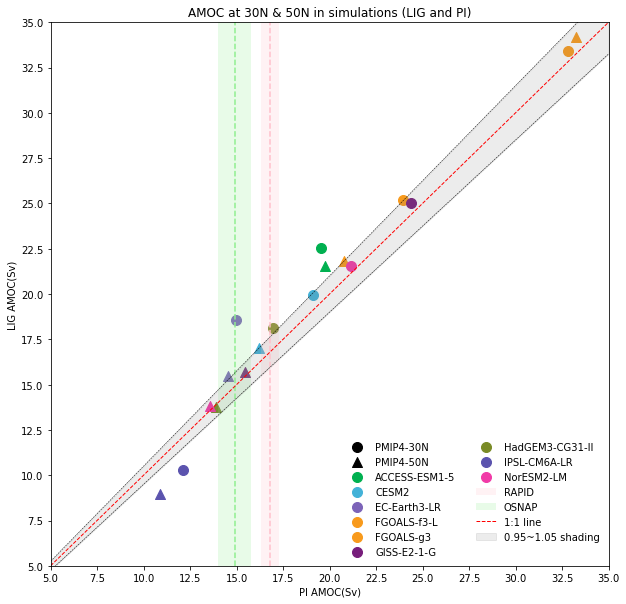

In [51]:
fig=plt.figure(figsize=(10,10)) 

ax=fig.add_subplot(111)

ax.scatter(0,0,color='k',marker='o',label='PMIP4-30N',s=100)
ax.scatter(0,0,color='k',marker='^',label='PMIP4-50N',s=100)
    

for k in range (0,len(lig_modelname)):
    ax.scatter(amoc_pi_30[k], amoc_lig_30[k], label=lig_model_name[k], color=(pmip4_r[k],pmip4_g[k],pmip4_b[k]), marker='o', s=100)
    ax.scatter(amoc_pi_50[k], amoc_lig_50[k], color=(pmip4_r[k],pmip4_g[k],pmip4_b[k]), marker='^', s=100)

    
#Y1=[5,5]
#Y2=[30,30]
#X1=[14,15.8]
#X2=[16.3,17.3]#overlap RAPID 16.8+/-0.5

X1=np.linspace(14,15.8,100) #OSNAP:14.9+/-0.9 Sv
X2=np.linspace(16.3,17.3,100) #overlap RAPID 16.8+/-0.5
Y1=5
Y2=35
ax.axvline(x=16.8,color='pink',linestyle="--",linewidth=1.5)
ax.fill_between(X2,Y1,Y2,facecolor='pink', alpha=0.2, label='RAPID') # define the range for x-axis, then define the range for y-axis (upper & bottom)
ax.axvline(x=14.9,color='lightgreen',linestyle="--",linewidth=1.5)
ax.fill_between(X1,Y1,Y2,facecolor='lightgreen', alpha=0.2, label='OSNAP')
    
x=np.linspace(5,35,100)
y=x
ax.plot(x,y,'--',linewidth=1, color='r',label='1:1 line')
ax.plot(x,0.95*y, '--',linewidth=0.5, color='black')
ax.plot(x,1.05*y, '--',linewidth=0.5, color='black')
ax.fill_between(x, 0.95*y, 1.05*y, color='grey', alpha=0.15, label='0.95~1.05 shading')
ax.set(xlabel='PI AMOC(Sv)',ylabel='LIG AMOC(Sv)')
ax.set_xlim(5,35)
ax.set_ylim(5,35)
ax.xaxis.set_major_locator(MultipleLocator(2.5))
ax.yaxis.set_major_locator(MultipleLocator(2.5))
ax.legend(loc='lower right',ncol=2, edgecolor='None',facecolor='None')
ax.set(title='AMOC at 30N & 50N in simulations (LIG and PI)')

# fgoalsg3 AMOC >30 Sv